In [161]:
import pandas as pd 
import numpy as n 
import matplotlib.pyplot as mtp 
from sklearn.linear_model import LinearRegression
import statsmodels.api as s
import plotly.express as px 


In [162]:
data = pd.read_csv('Dummy Data HSS.csv')
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [163]:
data.info

<bound method DataFrame.info of         TV      Radio  Social Media Influencer       Sales
0     16.0   6.566231      2.907983       Mega   54.732757
1     13.0   9.237765      2.409567       Mega   46.677897
2     41.0  15.886446      2.913410       Mega  150.177829
3     83.0  30.020028      6.922304       Mega  298.246340
4     15.0   8.437408      1.405998      Micro   56.594181
...    ...        ...           ...        ...         ...
4567  26.0   4.472360      0.717090      Micro   94.685866
4568  71.0  20.610685      6.545573       Nano  249.101915
4569  44.0  19.800072      5.096192      Micro  163.631457
4570  71.0  17.534640      1.940873      Macro  253.610411
4571  42.0  15.966688      5.046548      Micro  148.202414

[4572 rows x 5 columns]>

In [164]:
data.describe

<bound method NDFrame.describe of         TV      Radio  Social Media Influencer       Sales
0     16.0   6.566231      2.907983       Mega   54.732757
1     13.0   9.237765      2.409567       Mega   46.677897
2     41.0  15.886446      2.913410       Mega  150.177829
3     83.0  30.020028      6.922304       Mega  298.246340
4     15.0   8.437408      1.405998      Micro   56.594181
...    ...        ...           ...        ...         ...
4567  26.0   4.472360      0.717090      Micro   94.685866
4568  71.0  20.610685      6.545573       Nano  249.101915
4569  44.0  19.800072      5.096192      Micro  163.631457
4570  71.0  17.534640      1.940873      Macro  253.610411
4571  42.0  15.966688      5.046548      Micro  148.202414

[4572 rows x 5 columns]>

In [165]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [166]:
numeric_colums = data.select_dtypes(
    include="number"
).columns
numeric_colums

Index(['TV', 'Radio', 'Social Media', 'Sales'], dtype='object')

In [167]:
for i in numeric_colums:
    meaned = data[i].mean()
    data[i].fillna(meaned , inplace=True)

In [168]:
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [169]:
X_tv = s.add_constant(data['TV'])
X_radio = s.add_constant(data['Radio'])
X_Social = s.add_constant(data['Social Media'])
y = data['Sales']

In [170]:
model = s.OLS(y,X_tv).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.792e+05
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:04:24   Log-Likelihood:                -15765.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4570   BIC:                         3.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2849      0.259      1.100      0.2

In [171]:
a = model.params[0]
b = model.params[1]

In [172]:
sales = a + b*(12)
sales

42.93913732334191

In [173]:
scatterplot = px.scatter(data,
                         x='TV',
                         y='Sales',
                         color='Sales',
                         size=data['TV'],
                         title='TV advertisements on sales',
                         trendline="ols")

# Customize trendline appearance
scatterplot.update_traces(
    line=dict(color='black', width=10), 
    selector=dict(type='scatter', mode='lines') 
)

Text(0.5, 1.0, 'Scatter Plot with Regression Line')

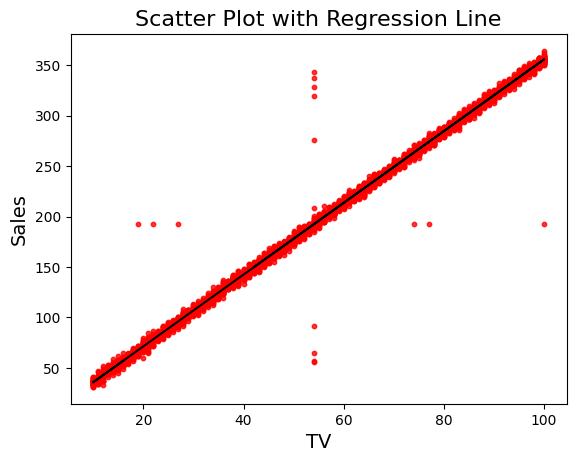

In [174]:
mtp.scatter(data['TV'],data['Sales'],marker='o', s=10, alpha=0.8, color='red')
mtp.plot(data['TV'],a + b*data['TV'] , c = 'Black' )
mtp.xlabel('TV', fontsize=14)
mtp.ylabel('Sales', fontsize=14)
mtp.title('Scatter Plot with Regression Line', fontsize=16)


In [175]:
model_r = s.OLS(y,X_radio).fit()
print(model_r.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:04:24   Log-Likelihood:                -24023.
No. Observations:                4572   AIC:                         4.805e+04
Df Residuals:                    4570   BIC:                         4.806e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9018      1.457     28.064      0.0

In [176]:
a_r = model_r.params[0]
b_r = model_r.params[1]
print(f'the slope is {b_r} and the intercept is {a_r}')

the slope is 8.345913987956404 and the intercept is 40.90183383578111


Text(0.5, 1.0, 'Scatter Plot with Regression Line')

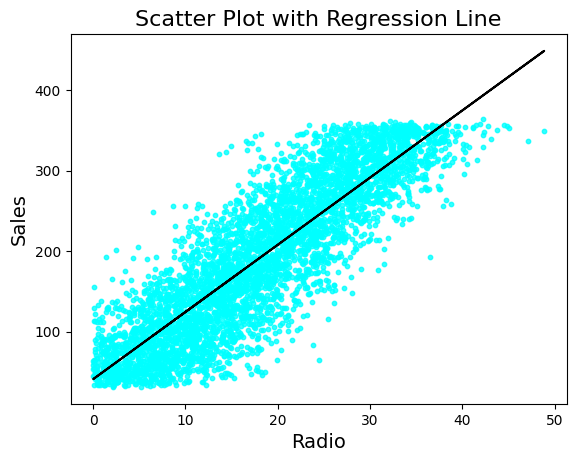

In [177]:
mtp.scatter(data['Radio'],data['Sales'],marker='o', s=10, alpha=0.8, color='cyan')
mtp.plot(data['Radio'],a_r + b_r*data['Radio'] , c = 'Black' )
mtp.xlabel('Radio', fontsize=14)
mtp.ylabel('Sales', fontsize=14)
mtp.title('Scatter Plot with Regression Line', fontsize=16)

In [178]:
lr = LinearRegression()


In [179]:
lr.fit(X_Social,y)

LinearRegression()

In [180]:
y_pred = lr.predict(X_Social)
y_pred

array([183.21991607, 172.1406201 , 183.34056196, ..., 231.86168767,
       161.72200622, 230.75814411])

In [187]:
scatterplot = px.scatter(data,
                         x='Social Media',
                         y='Sales',
                         color='Sales',
                         size=data['Social Media'],
                         title='SM influencers advertisements on sales',
                         trendline="ols")

# Customize trendline appearance
scatterplot.update_traces(
    line=dict(color='black', width=10), 
    selector=dict(type='scatter', mode='lines') 
)

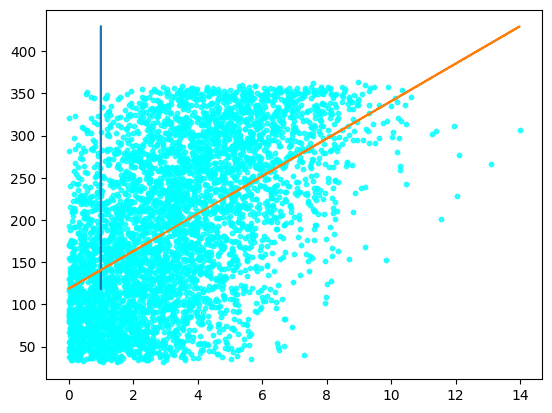

In [181]:
mtp.plot(X_Social,y_pred)
mtp.scatter(data['Social Media'],data['Sales'] , marker='o', s=10, alpha=0.8, color='cyan')